# DBSCAN Algorithm

## Steps

1. **Data Generation**
   - Generate or collect the data that will be used for clustering.

2. **Data Analysis**
   - Explore and preprocess the data to ensure it is suitable for the algorithm. This may include normalization, handling missing values, etc.

3. **Core points identification**
   - Identify core points based on min_sample and epsilon value

4. **Clusster formation using Corepoints**
    - If core points are close enough then make clusters out of them

5. **Border points and noise points identification**
    - Identify border and noise points based on epsilon value

6. **Include border points in the cluster**
    - Make border points parts of cluster if they are close enough

In [4]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import warnings

In [5]:
#Generate dataset

def make_moons(n_samples, noise):
    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    # Outer circle
    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out))
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out))

    # Inner circle
    inner_circ_x = 1 - np.cos(np.linspace(0, np.pi, n_samples_in))
    inner_circ_y = 1 - np.sin(np.linspace(0, np.pi, n_samples_in)) - .5

    X = np.vstack([np.hstack([outer_circ_x, inner_circ_x]), 
                   np.hstack([outer_circ_y, inner_circ_y])]).T

    X += noise * np.random.randn(*X.shape)
    y = np.hstack([np.zeros(n_samples_out, dtype=int), 
                   np.ones(n_samples_in, dtype=int)])
    return X, y

# Generate moons dataset
data, y = make_moons(n_samples=200, noise=0.12)



/var/folders/jx/t7ncjl6918dgffbz_r2yc6tw0000gn/T/ipykernel_190/2690938070.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], cmap='viridis', s=50)


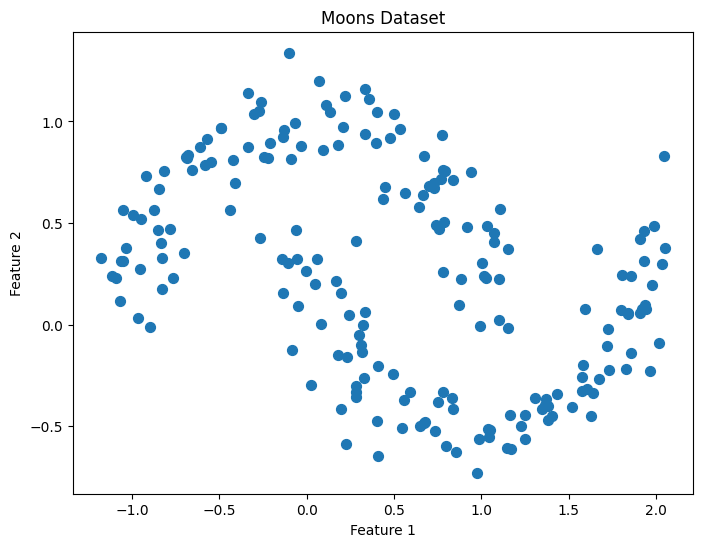

In [6]:
# plot dataset 
# Plot the moons dataset
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], cmap='viridis', s=50)
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

[-1 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1]


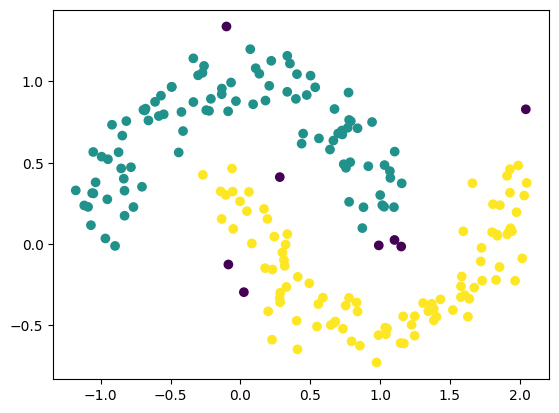

In [7]:
# First let's try with pre-build dbscan class
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(data)

labels = dbscan.labels_
print(labels)

plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()



In [ ]:
# Now let's implement dbscan